In [3]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [6]:
def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 50
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
        
    if higher_miss_value_column:
        print("Higher Missing values in Columns for Delete : \n\n", higher_miss_value_column) 
        
        return higher_miss_value_column
    else:
        print("There are no Higher Column Missing values in Dataset")
        
missing_val = get_percentage_miss_value(df)

Column->  education , total no of missing value :  2409  & :          4.4  %
Column->  previous_year_rating , total no of missing value :  4124  & :          7.52  %




There are no Higher Column Missing values in Dataset


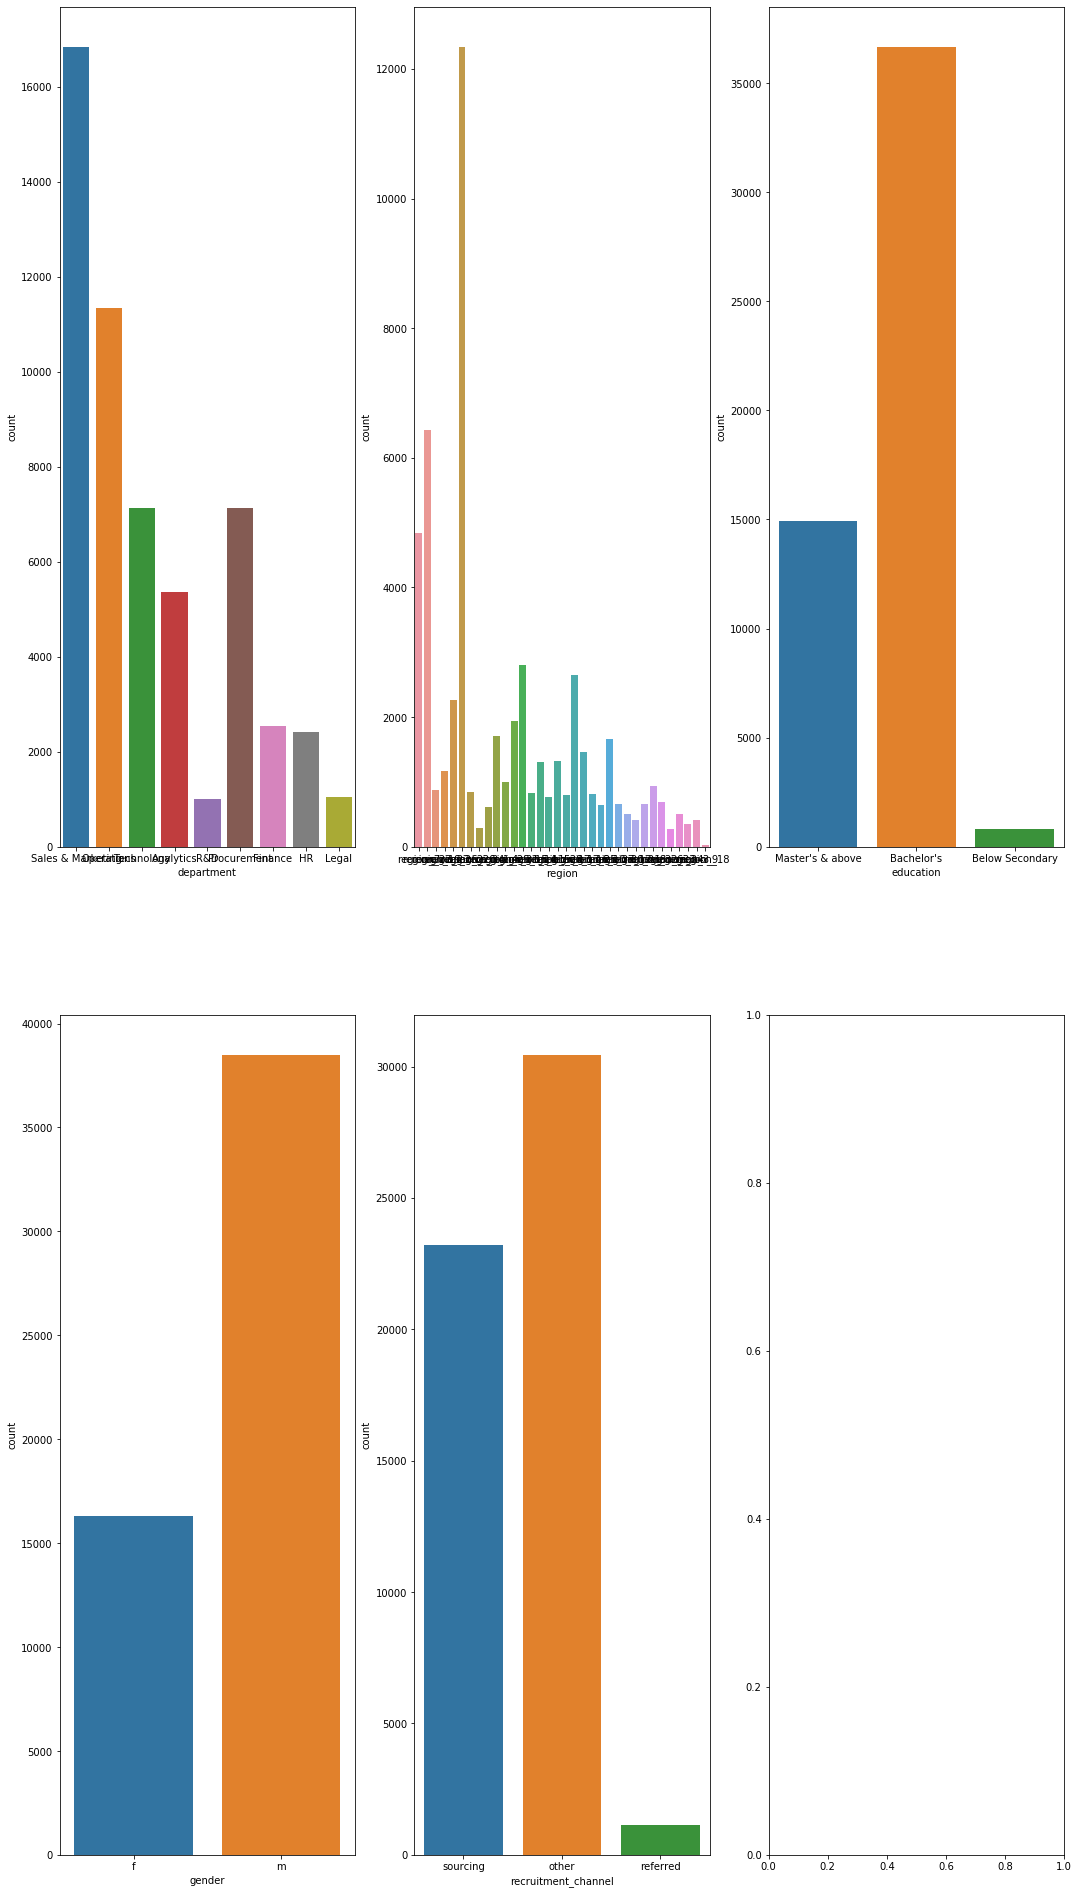

In [7]:
def visualize_categorical_values(dataset):
    no_of_columns = 3
    no_of_rows = 3
    
    columns_object_type = [i for i in dataset.columns  if dataset[i].dtype == "object"]
    total_rows = (len(columns_object_type) // no_of_rows ) + 1
    
    f, axes = plt.subplots(total_rows, no_of_columns, figsize=(18,34))

    for ind, val in enumerate(columns_object_type):
        sns.countplot(df[val] , ax = axes[ind // no_of_rows , ind %no_of_columns ])
    plt.show() 
    
visualize_categorical_values(df)

<Figure size 1296x2448 with 0 Axes>

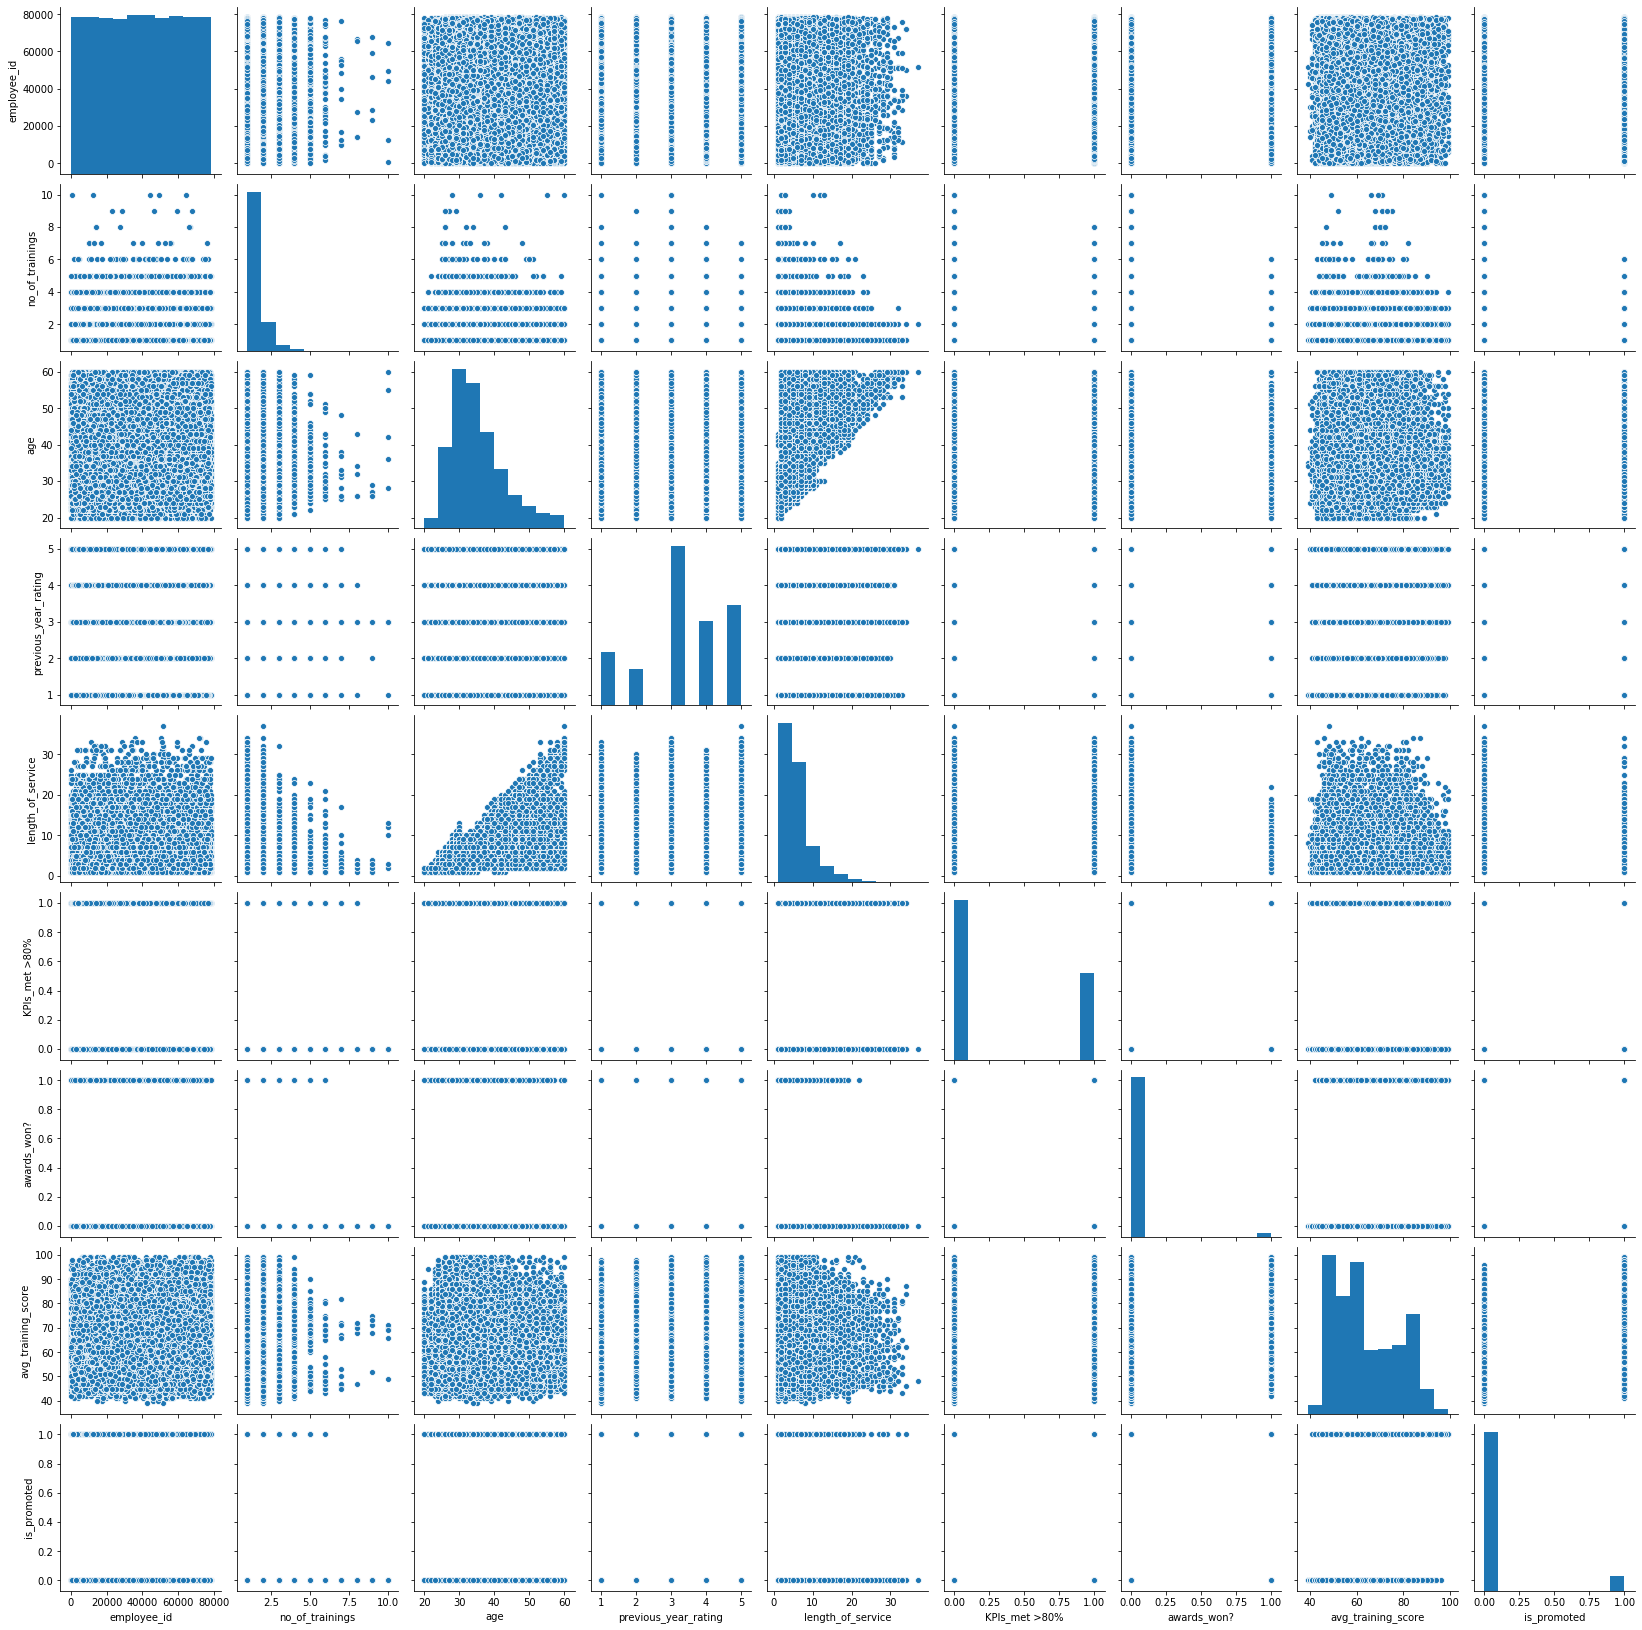

In [8]:
def visualize_numberical_values(dataset):
    plt.figure(figsize=(18,34))
    sns.pairplot(df)
    plt.show()
visualize_numberical_values(df)

In [9]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            
            print("*"*100)
            print("\n")
check_cloumn_details_type_categorical(df)

Columns name :   department
{'Sales & Marketing': 16840, 'Operations': 11348, 'Technology': 7138, 'Analytics': 5352, 'R&D': 999, 'Procurement': 7138, 'Finance': 2536, 'HR': 2418, 'Legal': 1039}
****************************************************************************************************


Columns name :   region
{'region_7': 4843, 'region_22': 6428, 'region_19': 874, 'region_23': 1175, 'region_26': 2260, 'region_2': 12343, 'region_20': 850, 'region_34': 292, 'region_1': 610, 'region_4': 1703, 'region_29': 994, 'region_31': 1935, 'region_15': 2808, 'region_14': 827, 'region_11': 1315, 'region_5': 766, 'region_28': 1318, 'region_17': 796, 'region_13': 2648, 'region_16': 1465, 'region_25': 819, 'region_10': 648, 'region_27': 1659, 'region_30': 657, 'region_12': 500, 'region_21': 411, 'region_8': 655, 'region_32': 945, 'region_6': 690, 'region_33': 269, 'region_24': 508, 'region_3': 346, 'region_9': 420, 'region_18': 31}
**************************************************************

In [10]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
            
            
def check_cloumn_details_type_float(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "float"):
            print("Columns name :  ",i  )
            
            print(dict(Counter(dataset[i])))
            print("*"*100)
            print("\n")
check_cloumn_details_type_numberical(df) 
check_cloumn_details_type_float(df)

Columns name :   employee_id
{65438: 1, 65141: 1, 7513: 1, 2542: 1, 48945: 1, 58896: 1, 20379: 1, 16290: 1, 73202: 1, 28911: 1, 29934: 1, 49017: 1, 60051: 1, 38401: 1, 77040: 1, 43931: 1, 7152: 1, 9403: 1, 17436: 1, 54461: 1, 12067: 1, 33332: 1, 58789: 1, 71177: 1, 52057: 1, 26585: 1, 37749: 1, 2370: 1, 8219: 1, 74759: 1, 27395: 1, 58536: 1, 35465: 1, 51756: 1, 57011: 1, 77064: 1, 64062: 1, 47123: 1, 56275: 1, 58304: 1, 25014: 1, 40097: 1, 23560: 1, 17423: 1, 61758: 1, 75009: 1, 17876: 1, 36924: 1, 50408: 1, 18013: 1, 24104: 1, 32083: 1, 38330: 1, 33690: 1, 73161: 1, 13596: 1, 45709: 1, 32709: 1, 26599: 1, 32656: 1, 17673: 1, 3113: 1, 9150: 1, 14107: 1, 58747: 1, 3342: 1, 77981: 1, 16502: 1, 73729: 1, 45624: 1, 75677: 1, 24040: 1, 68082: 1, 51786: 1, 77577: 1, 54782: 1, 52368: 1, 75103: 1, 7520: 1, 59147: 1, 53092: 1, 34564: 1, 66013: 1, 77135: 1, 44575: 1, 47498: 1, 20798: 1, 69094: 1, 22261: 1, 9589: 1, 62658: 1, 21628: 1, 68484: 1, 44523: 1, 35420: 1, 43923: 1, 64109: 1, 41983: 1, 2

{5.0: 11741, 3.0: 18618, 1.0: 6223, 4.0: 9877, nan: 1, nan: 1, nan: 1, 2.0: 4225, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1

In [11]:
def check_skewness_numerical(dataset,target):
    #analysing the distribution of HR Selection
    print('skew is', dataset[target].skew())   
    plt.hist(dataset['target'], color= 'b')

    plt.title('Distribution of HR section YES / NO', fontsize = 24)
    plt.ylabel('observation', fontsize = 20)
    plt.xlabel('selection', fontsize = 20)

    plt.show()
    
check_skewness_numerical(df , "target")

KeyError: 'target'

In [12]:
def drop_outliers(dataset, columns_name):
    for chk in columns_name:
        
#         plt.boxplot(dataset[chk]) # please with graph & it is optional
        
        Q1 = dataset[chk].quantile(.25)
        Q3 = dataset[chk].quantile(.75)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[chk] >= (Q1-(1.5*IQR))) & (dataset[chk] <= (Q3+(1.5*IQR)))] 
    return dataset

In [14]:
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    ax.tick_params(labelsize=20)



def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()

In [ ]:
def get_accuracy(y_train_val , y_pred_val , dataset_type = "Default"):
    
    print(" Dataset type is : ", dataset_type)
    
    accuracy = accuracy_score(y_train_val, y_pred_val)
    accuracy = round(accuracy, 4) * 100
    print("\n Accuracy Score     : ",accuracy)
    
    precision_accuracy = precision_score(y_train_val, y_pred_val)
    precision_accuracy = round(precision_accuracy, 4) * 100
    print("\n precision_accuracy : ",precision_accuracy)
    
    recall_accuracy = recall_score(y_train_val, y_pred_val)
    recall_accuracy = round(recall_accuracy, 4) * 100
    print("\n recall_accuracy    : ",recall_accuracy)
    
    roc_auc_accuracy = roc_auc_score(y_train_val, y_pred_val)
    roc_auc_accuracy = round(roc_auc_accuracy, 4) * 100
    print("\n roc_auc_accuracy   : ",roc_auc_accuracy)
    
    
    
    
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    

    
    

   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = accuracy_score(y_train, y_pred_train)
            train_acc = round(train_acc, 4) * 100
            
            test_acc = accuracy_score(y_test, y_pred)
            test_acc = round(test_acc, 4) * 100
            
            roc_auc_score_acc = roc_auc_score(y_test, y_pred)
            roc_auc_score_acc = round(roc_auc_score_acc, 4) * 100
            

            row = [names[j],   i,   train_acc, test_acc, roc_auc_score_acc]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    

    
    
names_regression = [ "LightGBM", "RF", "XGBoost" , "SVM"]
algorithms = [ LGBMClassifier(), RandomForestClassifier(), XGBClassifier(), SVC()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc" , "roc_auc_score"]

random_state_list_up_to_10 = [1,2,3]


addRandomStateForAlgorithm(X,Y,names_regression,algorithms,columns_name,random_state_list_up_to_10)

In [15]:
def maajority_imbalanced_dataset(dataset, target_col):
    feature_columns = df5.columns.tolist()
    feature_columns = [c for c in feature_columns if c not in [target_col]]

    X2 = df5[feature_columns]
    Y2 = df5[target_col]

    os =  RandomOverSampler(random_state=35)
    X_feature_variables , y_output = os.fit_sample(X2, Y2)
    
    return X_feature_variables , y_output

In [16]:

from sklearn.base import TransformerMixin, BaseEstimator

from collections import Counter , defaultdict

import pandas as pd
from pandas import Series as s , DataFrame as df
import numpy as np

import seaborn as sns
# import matplotlib.pyplot as plt

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6

import datetime
import datetime as dt


In [1]:

#Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

#preprocessing
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.pipeline import Pipeline

# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek # over sampling method 1

## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler # over sampling method 2

from imblearn.under_sampling import NearMiss

from iteration_utilities import duplicates, unique_everseen

In [5]:
df = pd.read_csv("train_LZdllcl.csv")

df_test = pd.read_csv("test_2umaH9m.csv")
submission = pd.read_csv("sample_submission_M0L0uXE.csv")

df10 = df.copy()
df.shape, df_test.shape, submission.shape

((54808, 14), (23490, 13), (23490, 2))

In [ ]:
submission_1 = submission.copy()

print(df_test.shape , submission.shape , len(y_pred_final))

submission_1["target"] = y_pred_final

print(submission_1["target"].values)

submission_1.to_csv('submission_7.csv', index=False)

df_submission_1 = pd.read_csv('submission_7.csv')
print(df_submission_1.shape)

df_submission_1.head(3)